<a href="https://colab.research.google.com/github/tushargupta123/deep-learning-practice/blob/main/transfer_learning_feature_extraction(with_data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [21]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [22]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
conv_base.trainable = False

In [24]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [26]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-28-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 198s 314ms/step - loss: 0.3079 - accuracy: 0.8653 - val_loss: 0.2130 - val_accuracy: 0.9080
Epoch 2/10
625/625 [==============================] - 165s 263ms/step - loss: 0.2438 - accuracy: 0.8946 - val_loss: 0.2041 - val_accuracy: 0.9100
Epoch 3/10
625/625 [==============================] - 176s 281ms/step - loss: 0.2186 - accuracy: 0.9057 - val_loss: 0.1983 - val_accuracy: 0.9158
Epoch 4/10
625/625 [==============================] - 195s 311ms/step - loss: 0.2079 - accuracy: 0.9131 - val_loss: 0.1926 - val_accuracy: 0.9174
Epoch 5/10
625/625 [==============================] - 183s 293ms/step - loss: 0.2003 - accuracy: 0.9152 - val_loss: 0.2074 - val_accuracy: 0.9122
Epoch 6/10
625/625 [==============================] - 159s 254ms/step - loss: 0.1899 - accuracy: 0.9197 - val_loss: 0.1974 - val_accuracy: 0.9196
Epoch 7/10
625/625 [==============================] - 156s 250ms/step - loss: 0.1773 - accuracy: 0.9262 - val_loss: 0.2003 -

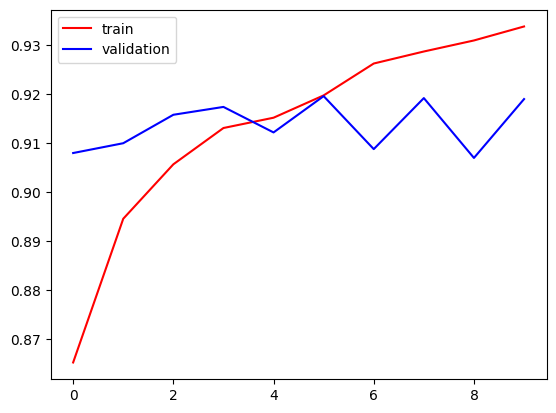

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

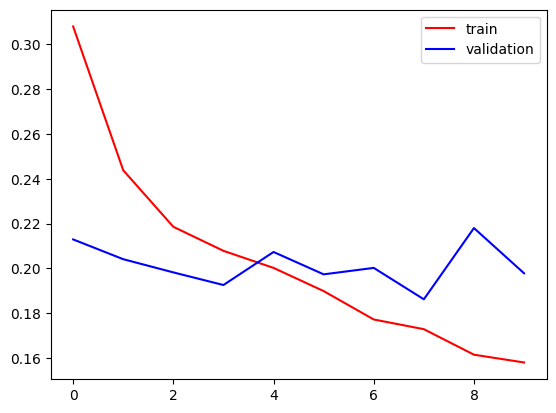

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# it removes overfitting and also improves val_accuracy